In [146]:
# U=European Centre for Disease Control
import pandas as pd
import requests
import matplotlib.pyplot as plt

df = pd.read_csv("https://opendata.ecdc.europa.eu/covid19/casedistribution/csv")

In [147]:
for country in df['countriesAndTerritories'].unique():
    print(country)

Afghanistan
Albania
Algeria
Andorra
Angola
Anguilla
Antigua_and_Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bonaire, Saint Eustatius and Saba
Bosnia_and_Herzegovina
Botswana
Brazil
British_Virgin_Islands
Brunei_Darussalam
Bulgaria
Burkina_Faso
Burundi
Cambodia
Cameroon
Canada
Cape_Verde
Cases_on_an_international_conveyance_Japan
Cayman_Islands
Central_African_Republic
Chad
Chile
China
Colombia
Comoros
Congo
Costa_Rica
Cote_dIvoire
Croatia
Cuba
Curaçao
Cyprus
Czechia
Democratic_Republic_of_the_Congo
Denmark
Djibouti
Dominica
Dominican_Republic
Ecuador
Egypt
El_Salvador
Equatorial_Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Falkland_Islands_(Malvinas)
Faroe_Islands
Fiji
Finland
France
French_Polynesia
Gabon
Gambia
Georgia
Germany
Ghana
Gibraltar
Greece
Greenland
Grenada
Guam
Guatemala
Guernsey
Guinea
Guinea_Bissau
Guyana
Haiti
Holy_See
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
I

In [148]:
def get_country(country = 'United_Kingdom'):
    df1 = df.loc[df['countriesAndTerritories'] == country][['countriesAndTerritories', 'dateRep', 'cases', 'deaths']]
    #df1['dateRep'] = pd.to_datetime(df['dateRep'])
    df1['dateRep'] = df1.apply(lambda row: pd.to_datetime(row['dateRep'], dayfirst = True), axis=1)
    df1.sort_values(by = 'dateRep', inplace = True)
    df1['cases'] = df1['cases'].apply(lambda x: x if x > 0 else 0 )
    df1['cases_7_days'] = df1.iloc[:,2].rolling(window=7).mean()
    df1['deaths'] = df1['deaths'].apply(lambda x: x if x > 0 else 0 )
    df1['deaths_7_days'] = df1.iloc[:,3].rolling(window=7).mean()
    return df1
df1 = get_country('Germany')
df1

,countriesAndTerritories,dateRep,cases,deaths,cases_7_days,deaths_7_days
19004,Germany,2019-12-31,0,0,NaN,NaN
19003,Germany,2020-01-01,0,0,NaN,NaN
19002,Germany,2020-01-02,0,0,NaN,NaN
19001,Germany,2020-01-03,0,0,NaN,NaN
19000,Germany,2020-01-04,0,0,NaN,NaN
...,...,...,...,...,...,...
18702,Germany,2020-10-28,14964,85,11925.285714,44.000000
18701,Germany,2020-10-29,16774,89,12709.142857,52.428571
18700,Germany,2020-10-30,18681,77,13771.857143,56.428571
18699,Germany,2020-10-31,19059,103,14392.571429,64.142857


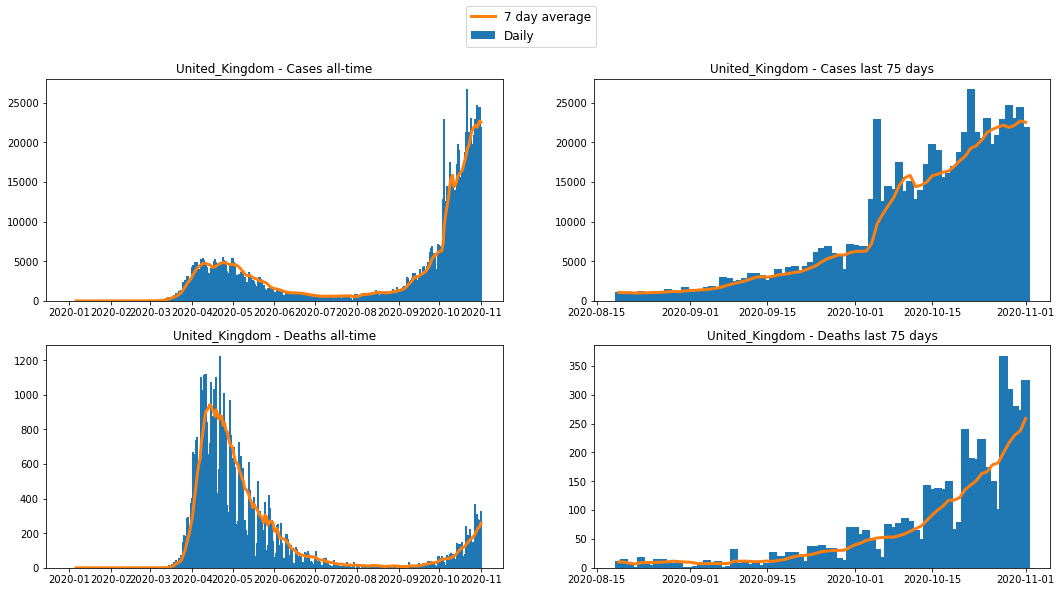

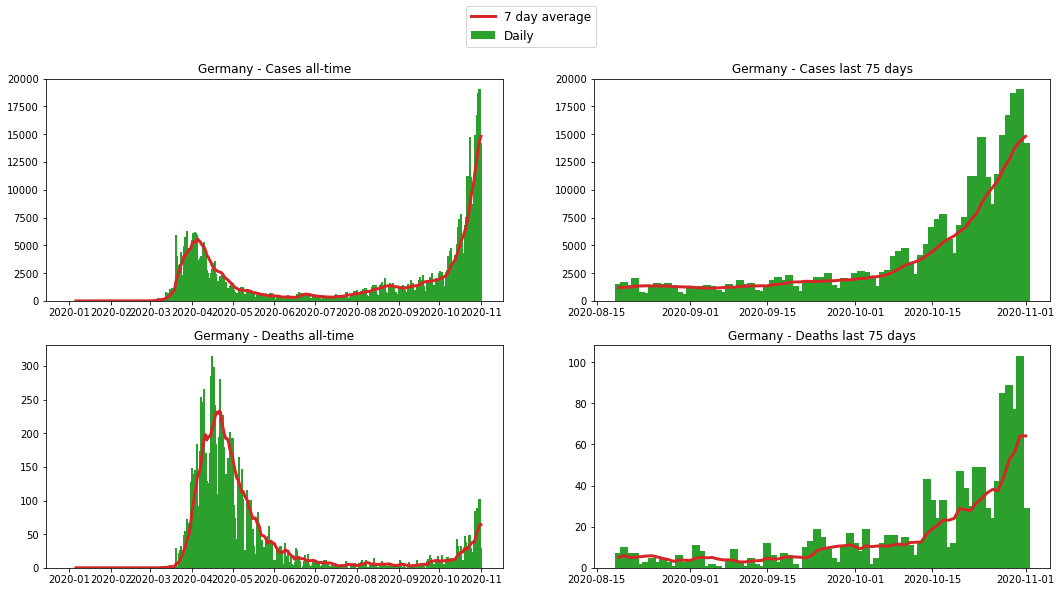

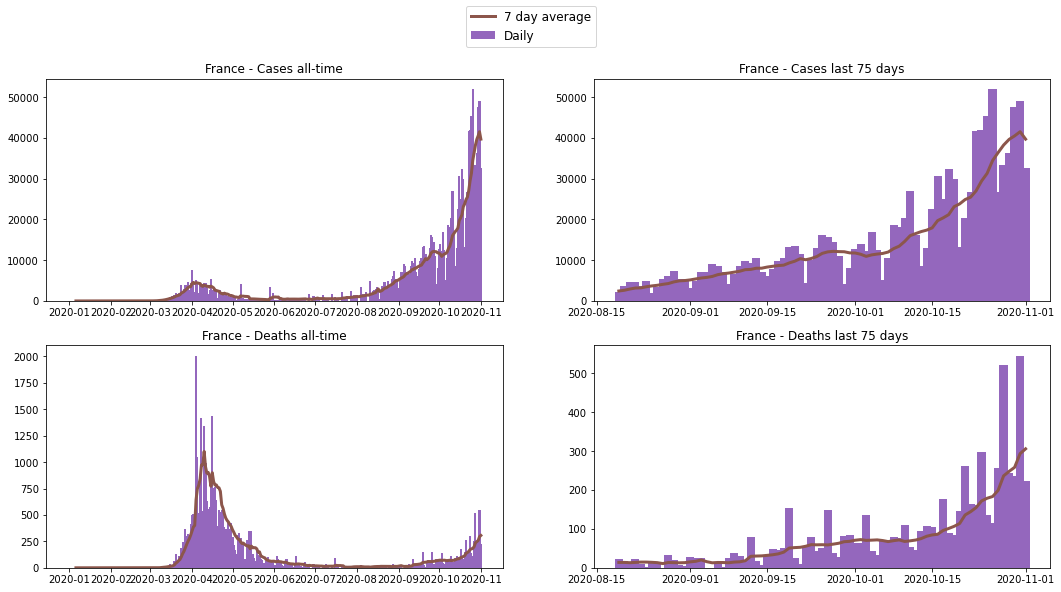

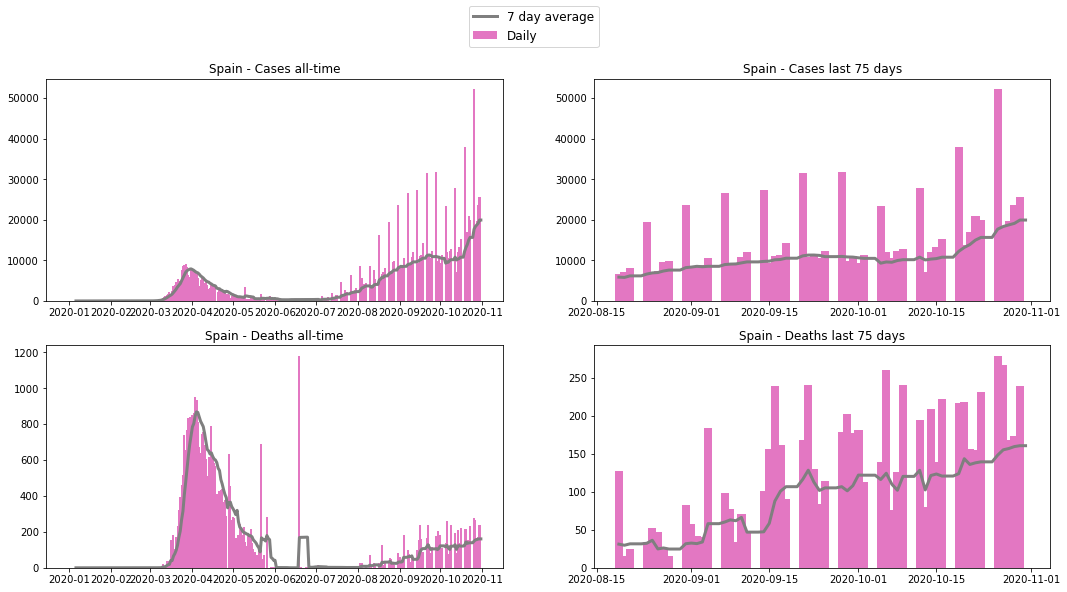

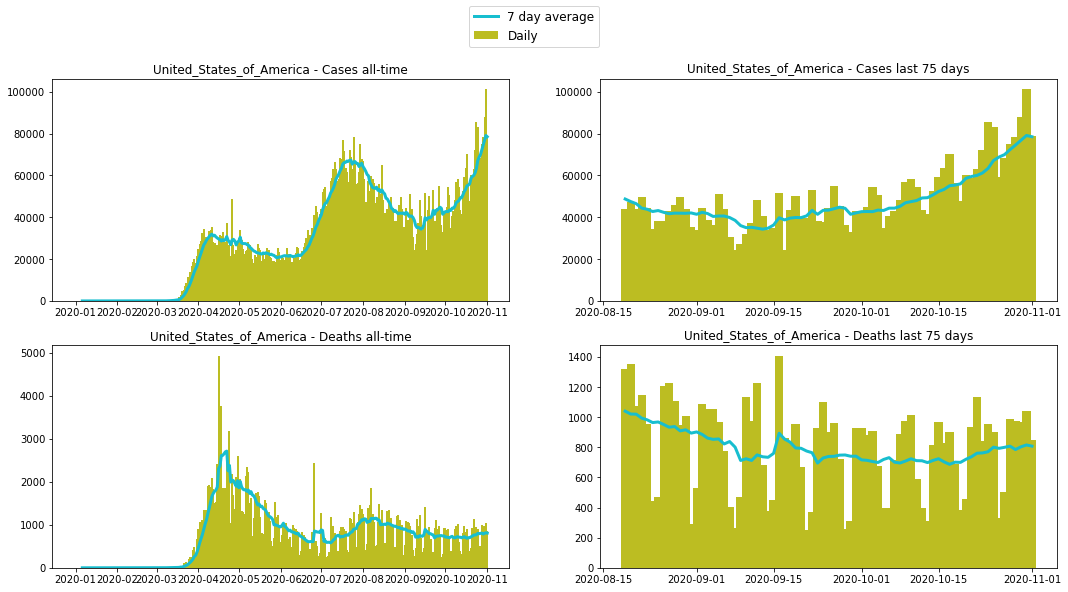

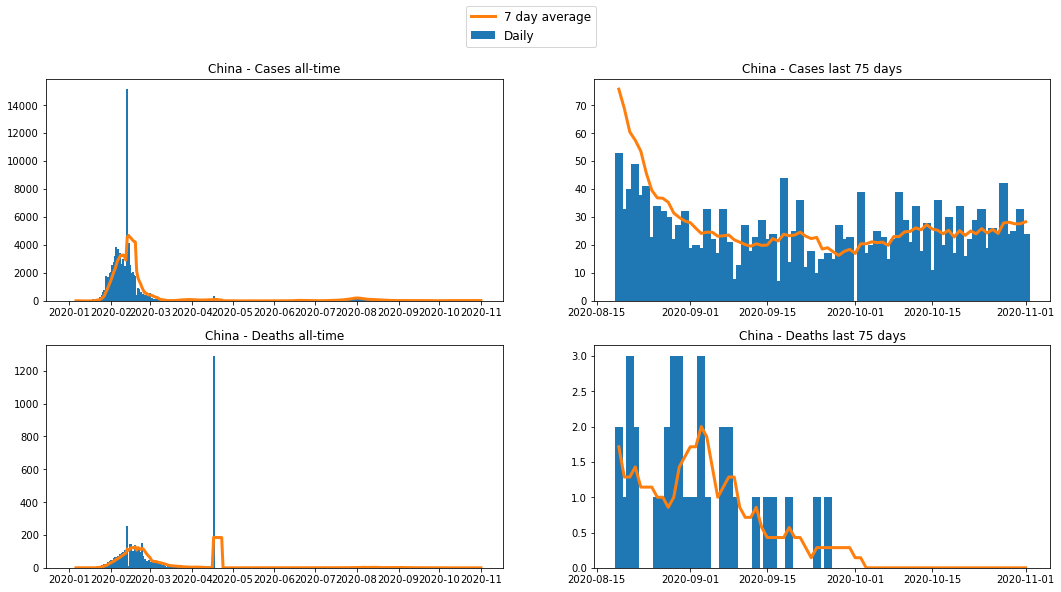

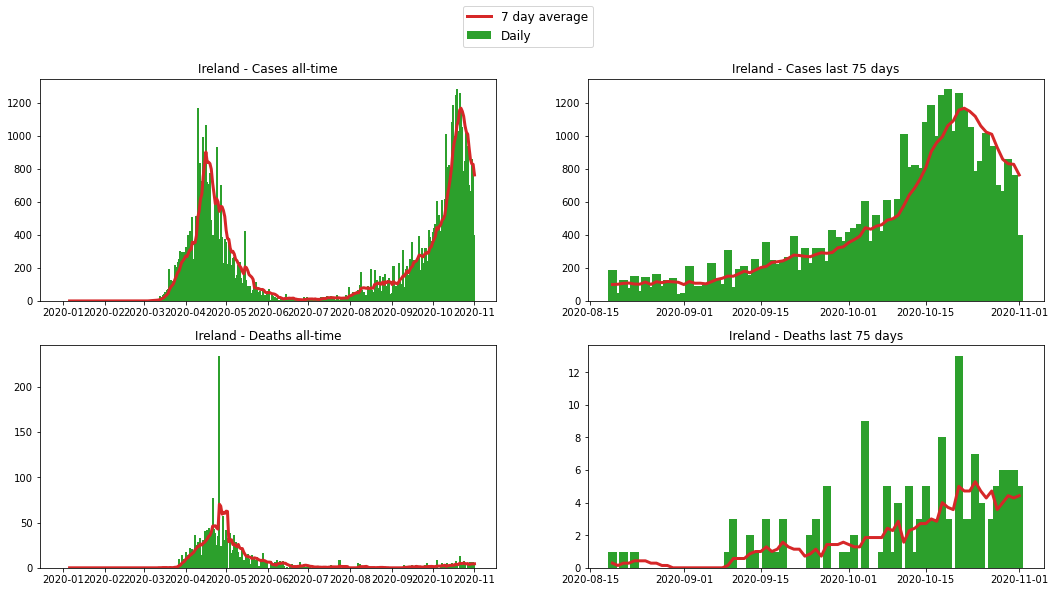

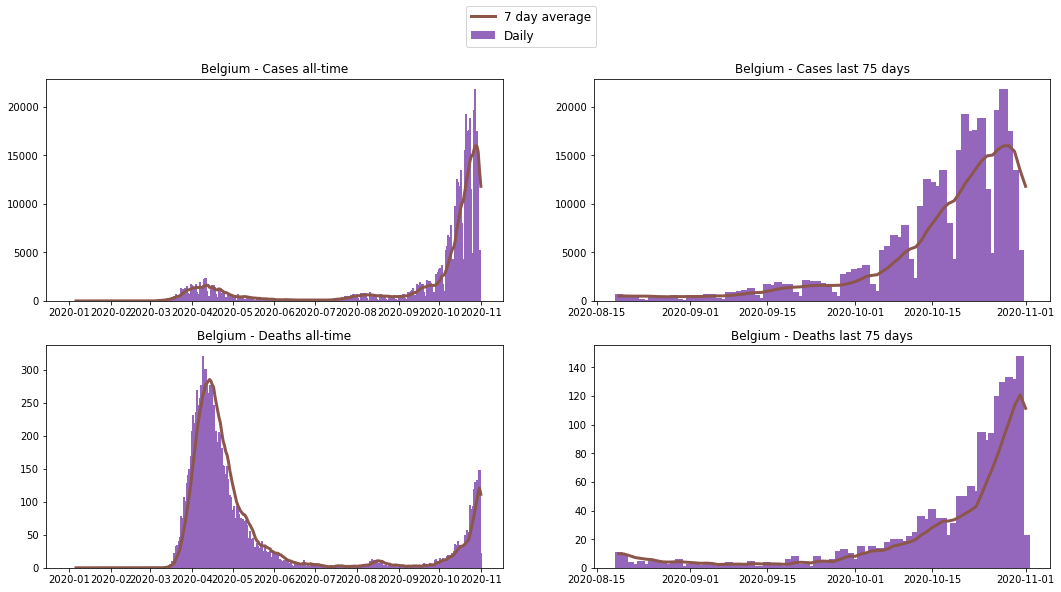

In [183]:
i = 0    # counter for colors
j = 1    # counter for colors
w = 1.5    # width of bars
d = 75    # number of days for the right hand charts

for country in ['United_Kingdom', 'Germany', 'France', 'Spain', 'United_States_of_America', 'China', 'Ireland', 'Belgium']:

    df1 = get_country(country)
    plt.rcParams["figure.figsize"] = (18,9)
    fig , ax = plt.subplots(2,2)

    plt.subplot(221)
    plt.bar('dateRep', 'cases', color='C{}'.format(i%10), data=df1, width=w)
    plt.plot('dateRep', 'cases_7_days', color='C{}'.format(j%10), data=df1, linewidth=3)
    plt.title('{} - Cases all-time'.format(country))

    plt.subplot(223)
    plt.bar('dateRep', 'deaths', color='C{}'.format((i)%10), data=df1, width=w)
    plt.plot('dateRep', 'deaths_7_days', color='C{}'.format((j)%10), data=df1, linewidth=3)
    plt.title('{} - Deaths all-time'.format(country))
    
    df1 = df1.loc[df1['dateRep'] > pd.to_datetime('today') - pd.offsets.DateOffset(days=d)]
    plt.subplot(222)
    plt.bar('dateRep', 'cases', color='C{}'.format(i%10), data=df1, width=w)
    plt.plot('dateRep', 'cases_7_days', color='C{}'.format(j%10), data=df1, linewidth=3)
    plt.title('{} - Cases last {} days'.format(country, d))

    plt.subplot(224)
    plt.bar('dateRep', 'deaths', color='C{}'.format((i)%10), data=df1, width=w)
    plt.plot('dateRep', 'deaths_7_days', color='C{}'.format((j)%10), data=df1, linewidth=3)
    plt.title('{} - Deaths last {} days'.format(country, d))
    fig.legend(['7 day average', 'Daily'], fontsize=12, loc=9)    # set the legend on
    i += 2
    j += 2
    
    plt.show()
    
    fig.savefig('{}.png'.format(country))

In [150]:
df1

,countriesAndTerritories,dateRep,cases,deaths,cases_7_days,deaths_7_days
10394,China,2020-09-03,19,3,24.142857,2.000000
10393,China,2020-09-04,33,1,24.571429,1.857143
10392,China,2020-09-05,22,0,24.571429,1.428571
10391,China,2020-09-06,17,0,23.142857,1.000000
10390,China,2020-09-07,33,2,23.285714,1.142857
10389,China,2020-09-08,21,2,23.571429,1.285714
10388,China,2020-09-09,8,1,21.857143,1.285714
10387,China,2020-09-10,13,0,21.000000,0.857143
10386,China,2020-09-11,27,0,20.142857,0.714286
10385,China,2020-09-12,18,0,19.571429,0.714286


In [151]:
df1['deaths'].apply(lambda x: print(x) )

3
1
0
0
2
2
1
0
0
0
1
0
1
1
0
0
1
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


10394    None
10393    None
10392    None
10391    None
10390    None
10389    None
10388    None
10387    None
10386    None
10385    None
10384    None
10383    None
10382    None
10381    None
10380    None
10379    None
10378    None
10377    None
10376    None
10375    None
10374    None
10373    None
10372    None
10371    None
10370    None
10369    None
10368    None
10367    None
10366    None
10365    None
10364    None
10363    None
10362    None
10361    None
10360    None
10359    None
10358    None
10357    None
10356    None
10355    None
10354    None
10353    None
10352    None
10351    None
10350    None
10349    None
10348    None
10347    None
10346    None
10345    None
10344    None
10343    None
10342    None
10341    None
10340    None
10339    None
10338    None
10337    None
10336    None
10335    None
Name: deaths, dtype: object

In [152]:
df1

,countriesAndTerritories,dateRep,cases,deaths,cases_7_days,deaths_7_days
10394,China,2020-09-03,19,3,24.142857,2.000000
10393,China,2020-09-04,33,1,24.571429,1.857143
10392,China,2020-09-05,22,0,24.571429,1.428571
10391,China,2020-09-06,17,0,23.142857,1.000000
10390,China,2020-09-07,33,2,23.285714,1.142857
10389,China,2020-09-08,21,2,23.571429,1.285714
10388,China,2020-09-09,8,1,21.857143,1.285714
10387,China,2020-09-10,13,0,21.000000,0.857143
10386,China,2020-09-11,27,0,20.142857,0.714286
10385,China,2020-09-12,18,0,19.571429,0.714286


In [153]:
df1.loc[df1['dateRep'] > pd.to_datetime('today') - pd.offsets.DateOffset(days=60)]

,countriesAndTerritories,dateRep,cases,deaths,cases_7_days,deaths_7_days
10394,China,2020-09-03,19,3,24.142857,2.000000
10393,China,2020-09-04,33,1,24.571429,1.857143
10392,China,2020-09-05,22,0,24.571429,1.428571
10391,China,2020-09-06,17,0,23.142857,1.000000
10390,China,2020-09-07,33,2,23.285714,1.142857
10389,China,2020-09-08,21,2,23.571429,1.285714
10388,China,2020-09-09,8,1,21.857143,1.285714
10387,China,2020-09-10,13,0,21.000000,0.857143
10386,China,2020-09-11,27,0,20.142857,0.714286
10385,China,2020-09-12,18,0,19.571429,0.714286


In [154]:
pd.offsets.DateOffset(days=60)

<DateOffset: days=60>

In [155]:
pd.to_datetime('today') - pd.offsets.DateOffset(days=60)

Timestamp('2020-09-02 15:14:59.485804')

In [156]:
12%10

2

In [158]:
0%10

0